In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,939 cases (7 day average) as of Sun 23 May, +45.1 since Sat 22 May
88 hospitalised (7 day average) as of Wed 26 May, +0.0 since Mon 24 May
4 died (7 day average) as of Sun 23 May, +0.0 since Sat 22 May


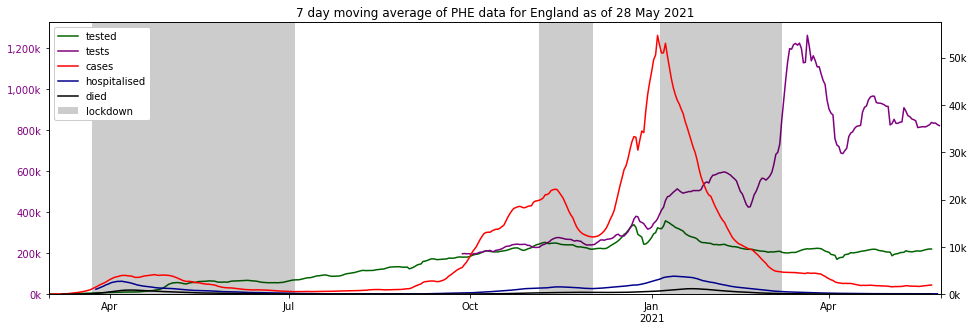

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

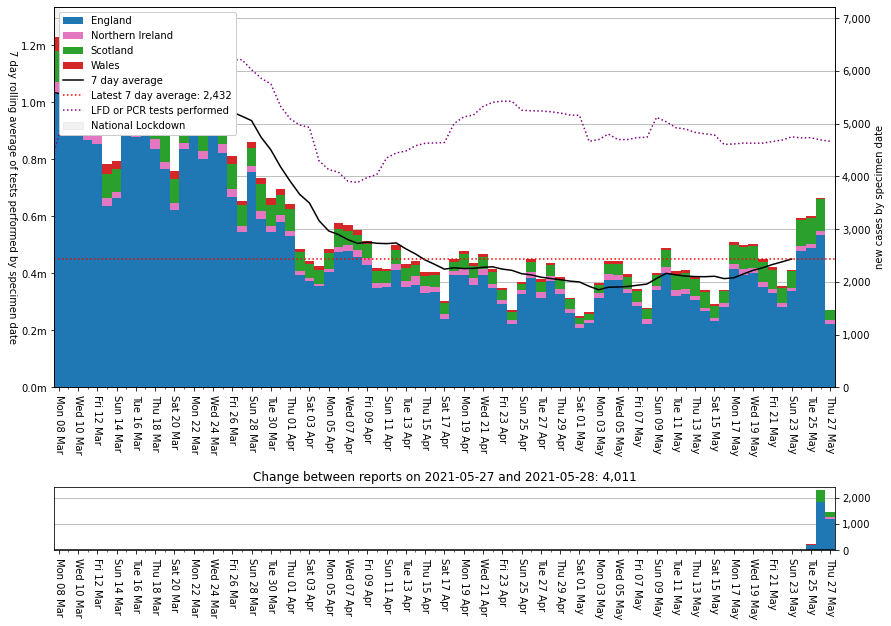

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

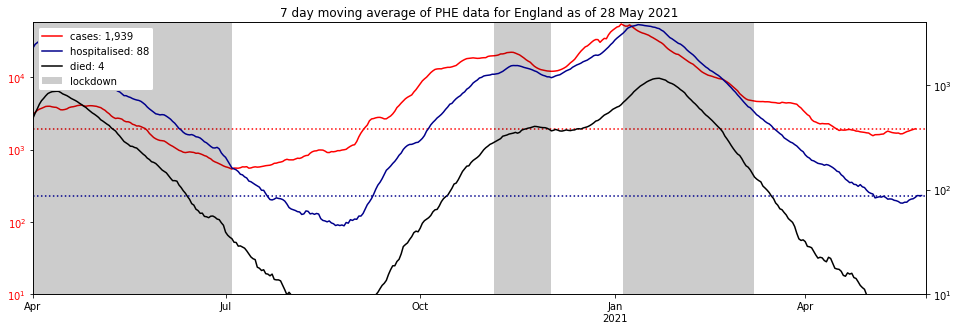

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

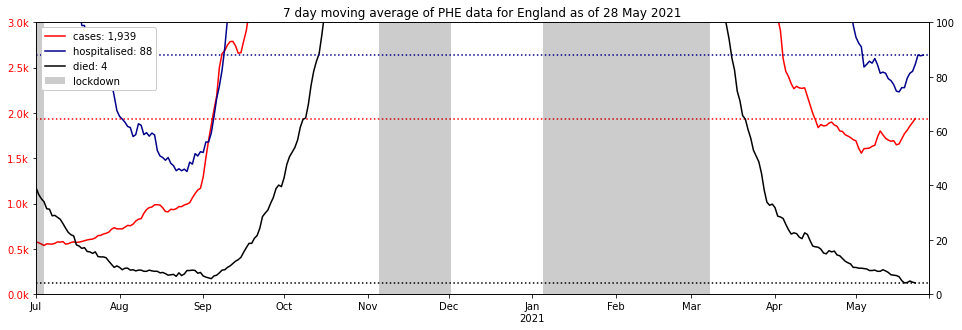

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=3_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=100)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,27 May 21,"+20,777,366","+32,509,194","+20,777,366","+374,042","+223,510","+374,042"
Northern Ireland,27 May 21,"+648,518","+1,037,892","+648,518","+8,635","+3,749","+8,635"
Scotland,27 May 21,"+1,971,006","+3,196,051","+1,971,006","+28,721","+21,244","+28,721"
Wales,27 May 21,"+1,081,162","+2,128,063","+1,081,162","+22,698","+8,014","+22,698"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,20777366.0,32509194.0,11731828.0,56286961,36.913284,20.842888,42.243828
1,Northern Ireland,N92000002,648518.0,1037892.0,389374.0,1893667,34.246676,20.561904,45.191420
2,Scotland,S92000003,1971006.0,3196051.0,1225045.0,5463300,36.077206,22.423169,41.499625
3,Wales,W92000004,1081162.0,2128063.0,1046901.0,3152879,34.291262,33.204604,32.504134


'partial: 38,871,200 (58.2%), full: 24,478,052'

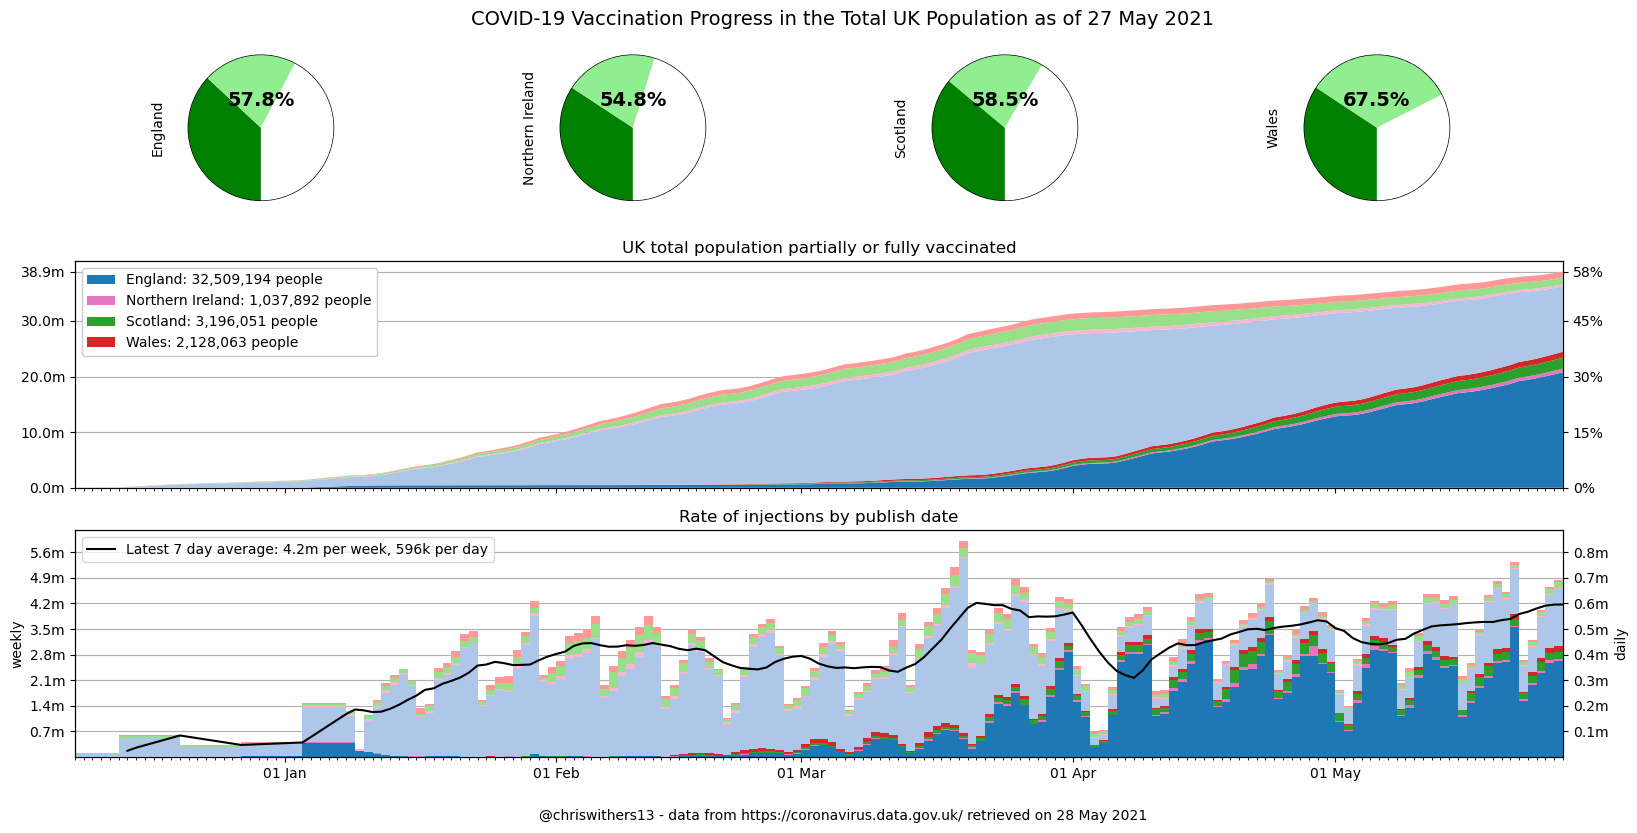

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

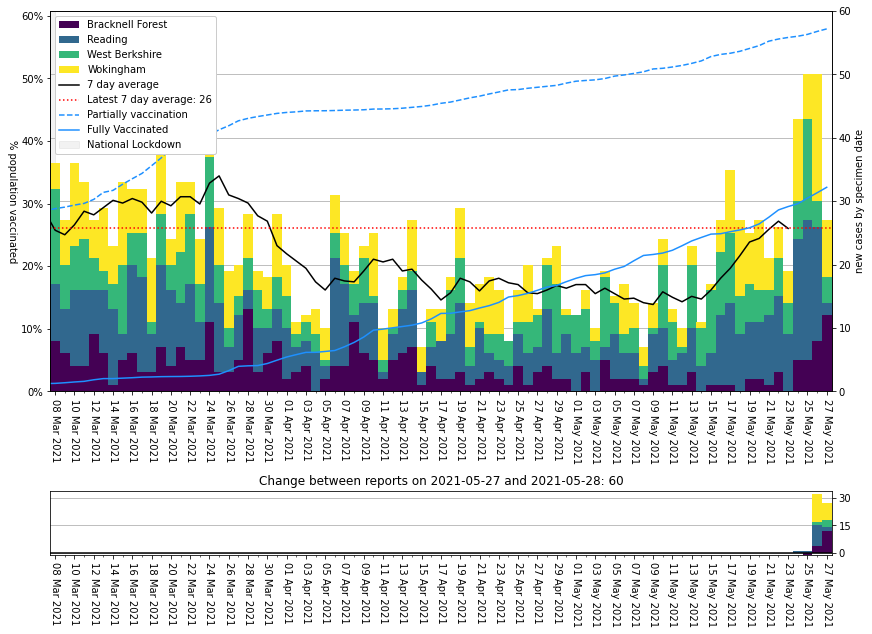

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], ylim=60,  lines=population_vaccinated)

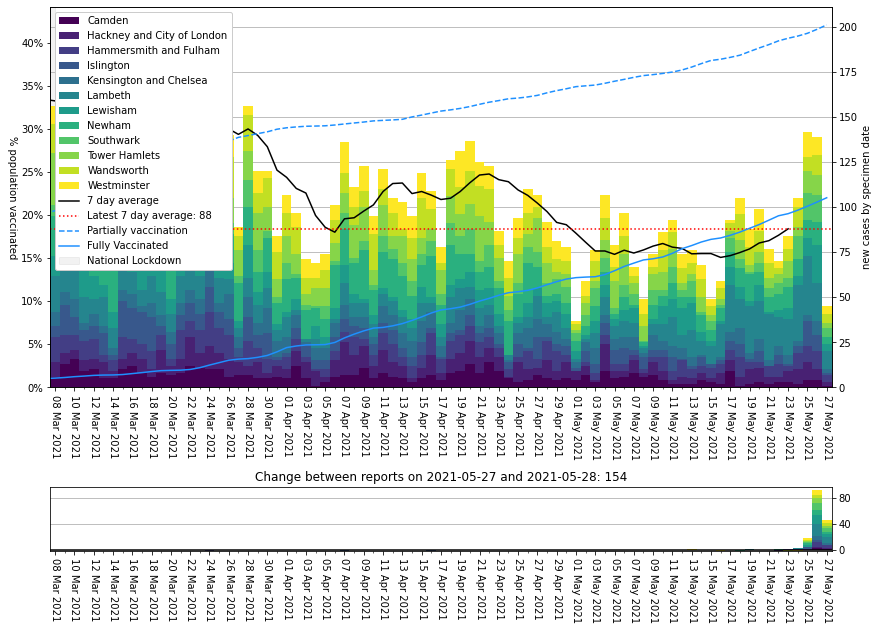

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000008,Blackburn with Darwen,364.739205,546.0,2021-05-27
E08000001,Bolton,344.983481,992.0,2021-05-27
E07000125,Rossendale,279.790717,200.0,2021-05-27
E06000055,Bedford,145.419292,252.0,2021-05-27
E07000120,Hyndburn,141.899979,115.0,2021-05-27
S12000038,Renfrewshire,133.445003,239.0,2021-05-27
S12000011,East Renfrewshire,120.381032,115.0,2021-05-27
S12000049,Glasgow City,114.828153,727.0,2021-05-27
E07000123,Preston,103.398889,148.0,2021-05-27


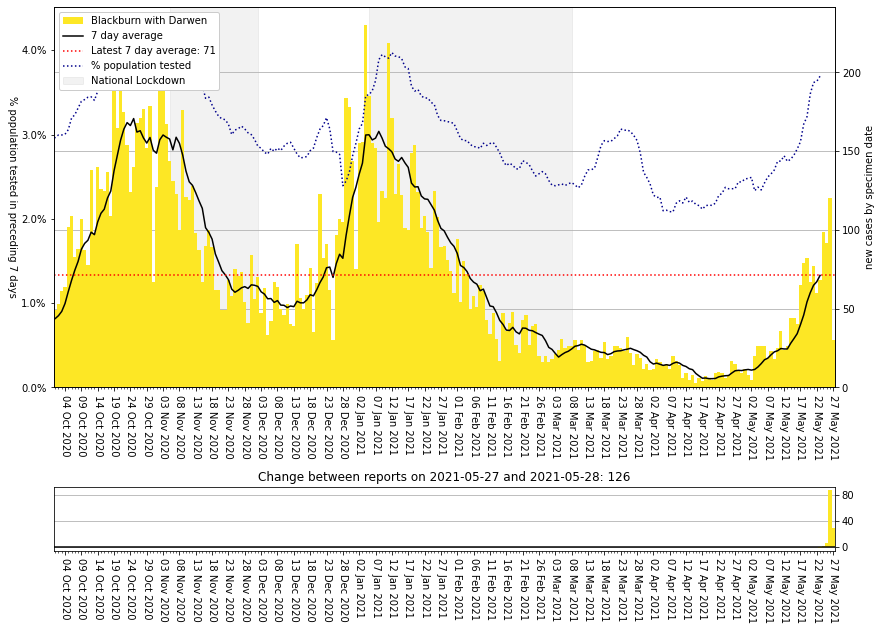

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,344.983481,992.0,2021-05-27
S12000049,Glasgow City,114.828153,727.0,2021-05-27
E06000008,Blackburn with Darwen,364.739205,546.0,2021-05-27
E08000003,Manchester,89.896501,497.0,2021-05-27
E08000034,Kirklees,99.821050,439.0,2021-05-27
E08000025,Birmingham,33.280318,380.0,2021-05-27
S12000036,City of Edinburgh,64.389538,338.0,2021-05-27
E08000032,Bradford,52.614418,284.0,2021-05-27
E08000035,Leeds,33.159383,263.0,2021-05-27


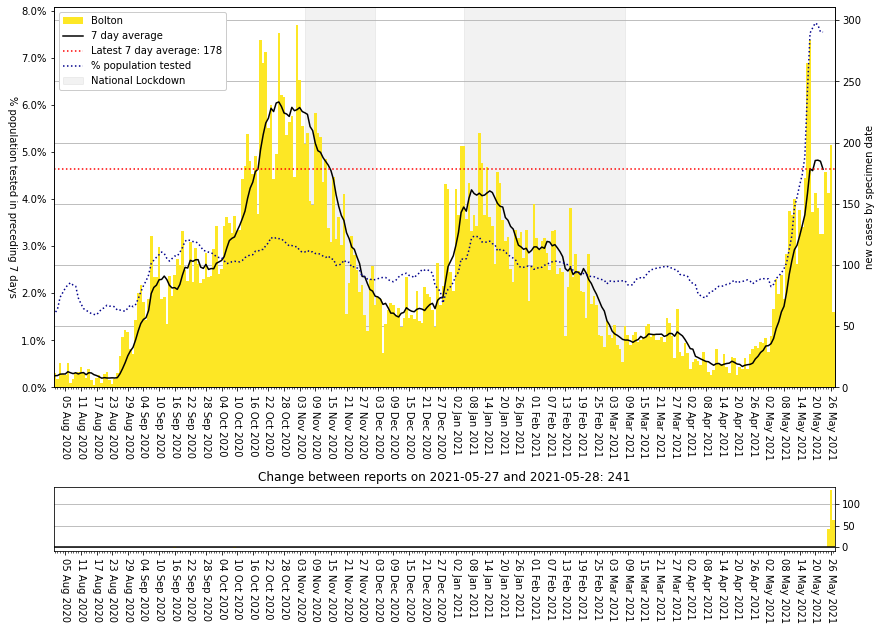

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested, earliest='2020-08')

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.25

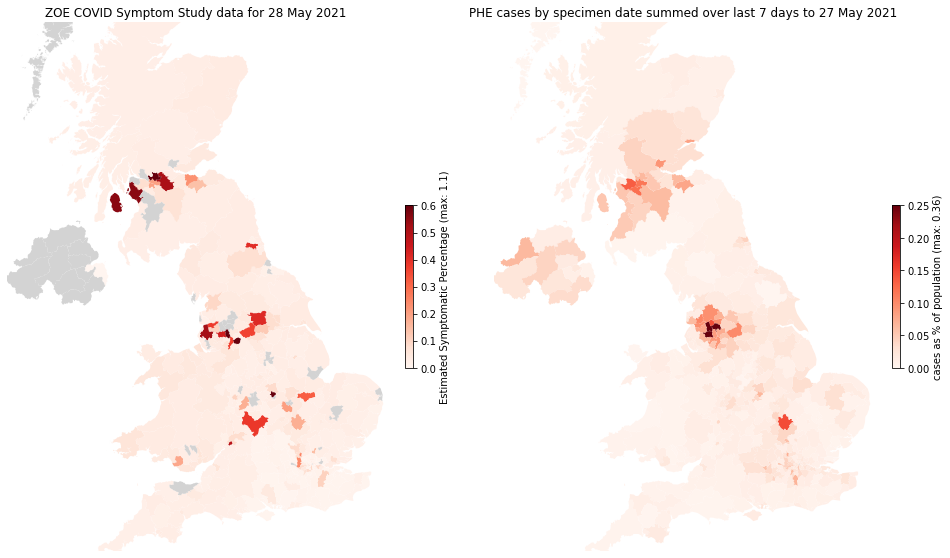

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...